In [192]:
import numpy as np  
from scipy.linalg import norm  
  
def soft_threshold(x, tau):  
    # 软阈值操作   
    return np.maximum(0, np.abs(x) - tau) * np.sign(x)  

In [194]:
def admm_tv_denoising(noisy_image, lambda_tv, rho, max_iter):  
    # 初始化变量  
    n = noisy_image.shape[0]
    noisy_image=np.array([noisy_image.flatten()]).T
    print('noisy_image',noisy_image.shape)
    x = noisy_image.copy()  # 原始图像变量  
    z = np.zeros((2*(n**2),1))   # 辅助变量  
    y = np.zeros((2*(n**2),1))    # 拉格朗日乘子  
    tau_inv = 1.0 / rho 
    
    D=np.identity(n)
    D[0,0]=0
    for i in range(n-1): 
        D[i+1,i]=-1
    
    B=np.zeros((2*(n**2),n**2))
    B=np.concatenate((np.kron(np.identity(n),D),np.kron(D,np.identity(n))),axis=0)
    
    M=np.linalg.inv(rho*np.dot(B.T,B)+np.identity(n**2))
        

    # 迭代更新  
    for _ in range(max_iter):  
        # 更新x  
        x=np.dot(M,noisy_image+rho*np.dot(B.T,y+z/rho))
  
        # 更新y  
        y_old = y.copy()  
        y = soft_threshold(np.dot(B,x)-z/rho, lambda_tv/rho)  
  
        # 更新y  
        z=z+1.618*(y-np.dot(B,x)) 
  
        # 检查收敛性（可选）  
#         if norm(u - u_old) <1e-1   #some_tolerance:  
#             break  
  
    # 返回去噪后的图像  
    return x  

In [195]:
# 定义计算 PSNR 函数
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2) # 计算均方误差
    if mse == 0: # 如果两幅图像完全相同，返回无穷大
        return np.inf
    else: # 否则，根据公式计算 PSNR
        return 20 * np.log10(255 / np.sqrt(mse))

noisy_image (2500, 1)


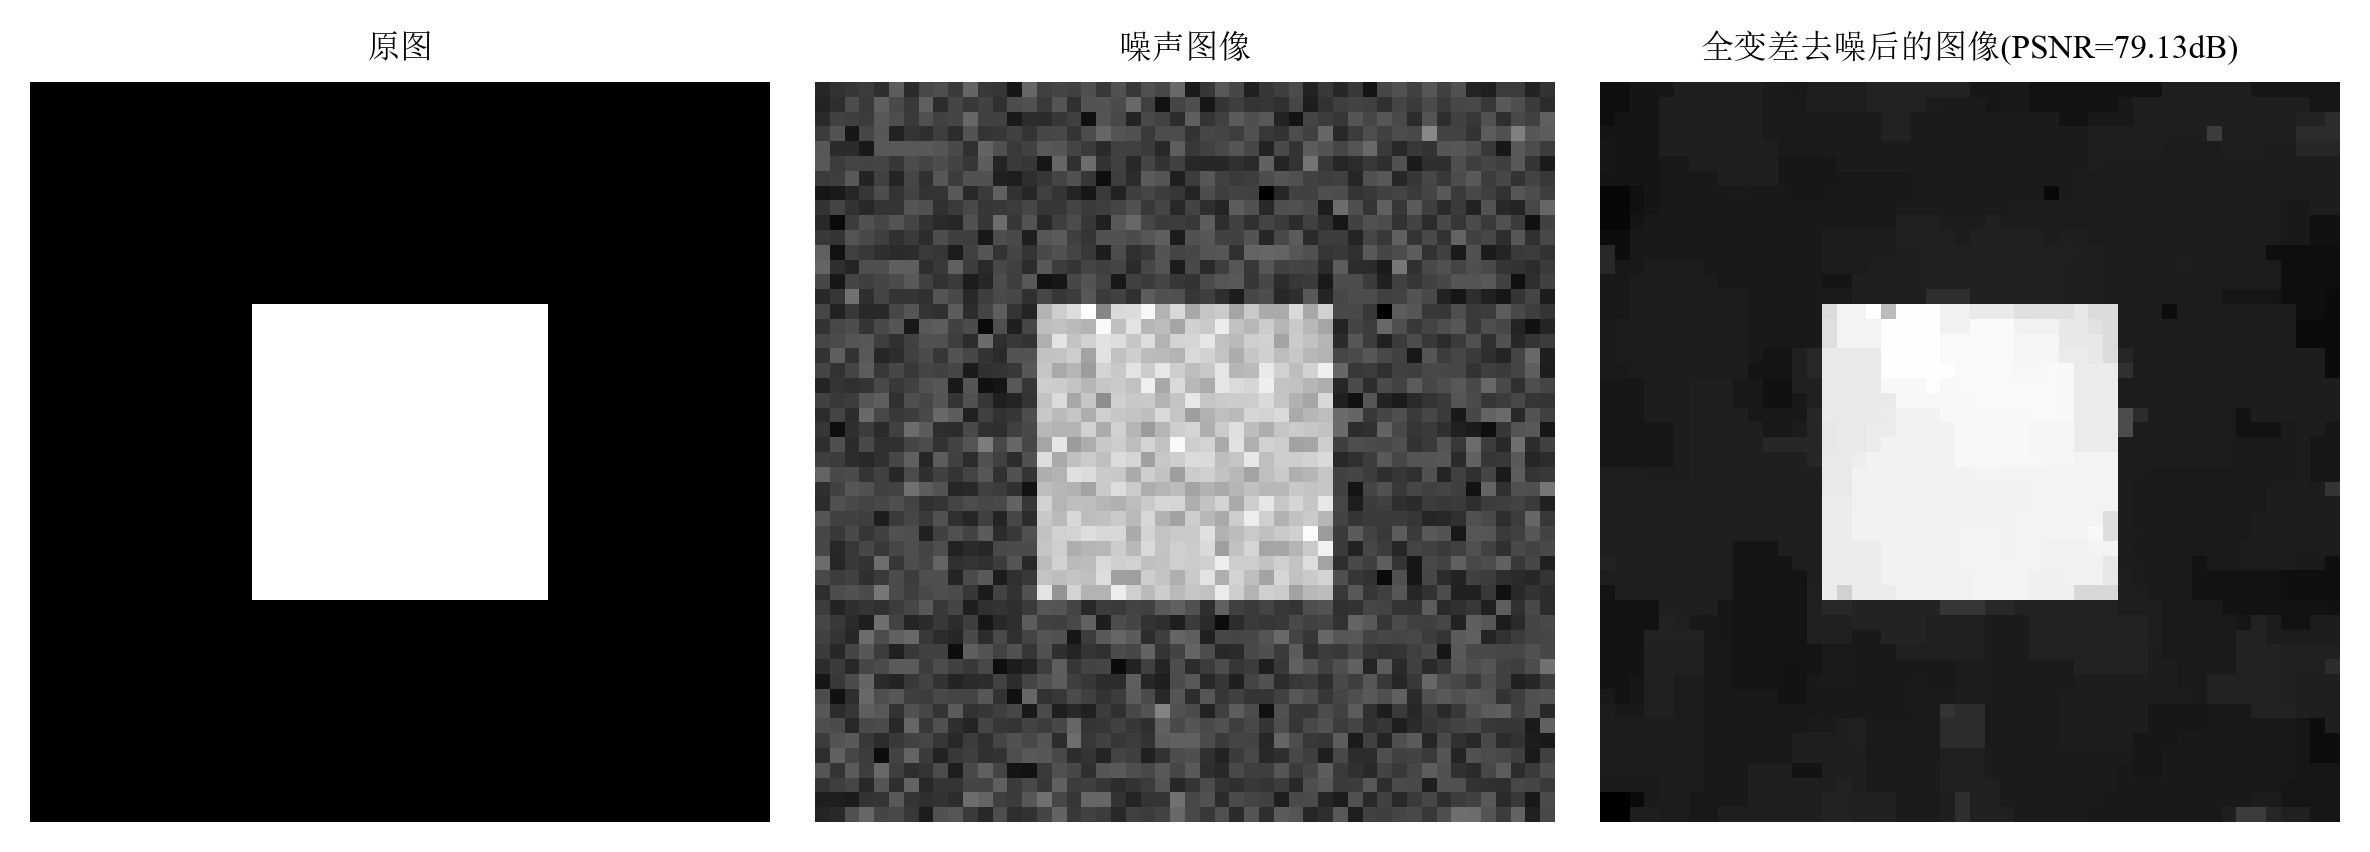

In [199]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.ndimage import uniform_filter  
plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman, SimSun' 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300  
# 生成原始图像（这里我们使用一个简单的二维图像作为示例）  
original_image = np.zeros((50, 50))  
original_image[15:35, 15:35] = 1  # 在中心放置一个方块  
  
# 添加噪声  
noise = np.random.normal(0, 0.15, original_image.shape)  
noisy_image = original_image + noise  
  
# 展示原图  
plt.figure(figsize=(8, 4))  
plt.subplot(1, 3, 1)  
plt.imshow(original_image, cmap='gray')  
plt.title(f'原图',fontsize=8)  
plt.axis('off')  
  
# 展示噪声图像  
plt.subplot(1, 3, 2)  
plt.imshow(noisy_image, cmap='gray')  
plt.title(f'噪声图像',fontsize=8) 
plt.axis('off')  
  
# ADMM-TV去噪算法（这里使用之前定义的函数）  
lambda_tv = 0.1  # TV正则化参数  
rho = 1       # ADMM算法中的参数  
max_iter = 200  # 最大迭代次数  
denoised_image = admm_tv_denoising(noisy_image, lambda_tv, rho, max_iter)  
  
# 展示去噪后的图像  
plt.subplot(1, 3, 3)  
plt.imshow(denoised_image.reshape(50,50), cmap='gray')  
psnr_recovered = psnr(original_image,denoised_image.reshape(50,50)) 
plt.title(f'全变差去噪后的图像(PSNR={psnr_recovered:.2f}dB)',fontsize=8) # 设置子图标题，保留两位小数  
plt.axis('off')  
  
# 显示所有图像  
plt.tight_layout()  
plt.savefig('Square_TV.png')
plt.show()